<a href="https://colab.research.google.com/github/Pamela-YC-Cheng/Financial-Analyst/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Transaction Detection

### Set up environment and import packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
raw_df= pd.read_csv('/Users/pamelacheng/Documents/Project and Data/Card Fraud Detection/card_transdata.csv')

### Understand the dataset

In [ ]:
raw_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
labels=["Normal","Fraud"]

fraud_or_not = raw_df["fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=raw_df['fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["lightblue","orange"]
             ,title="Fraud vs Normal transactions")
fig.show()

print('Normal:', round(raw_df['fraud'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Frauds:', round(raw_df['fraud'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')

Normal: 91.26 % of the dataset
Frauds: 8.74 % of the dataset


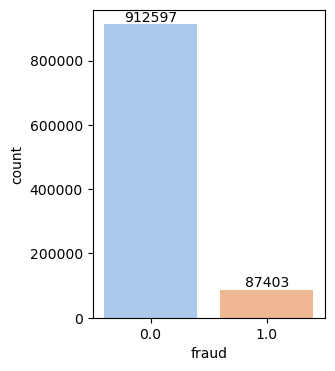

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='fraud',data=raw_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
raw_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df= raw_df.copy()

### Prepare the data- undersampling for imbalanced dataset and transformation

In [ ]:
import random

# Majority('Not Fraudulent')/ Minority('Fradulent')

#Get the indices of majority class instances
majority_indices = df[df['fraud'] == 0].index

#Get the number of minority class instances
num_minority = sum(df['fraud'] == 1)
print(f'The number of fradulent transaction is {num_minority}, so we sampled the same amout of data from normal \
transaction to get balanced dataset for model training')

#Take a random sample of the majority indices (the number of items in the sample = num_minority)
RANDOM_STATE = 42
random.seed(RANDOM_STATE)
undersampled_majority_indices = random.sample(list(majority_indices), num_minority)


#Create a new DataFrame with the undersampled data
undersampled_df = df.loc[undersampled_majority_indices]
minority_df = df[df['fraud'] == 1]

# Create a new DataFrame with the undersampled data
undersampled_df = pd.concat([undersampled_df, minority_df], ignore_index=True)

The number of fradulent transaction is 87403, so we sampled the same amout of data from normal transaction to get balanced dataset for model training


In [ ]:
undersampled_df['fraud'].value_counts()

fraud
0.0    87403
1.0    87403
Name: count, dtype: int64

In [ ]:
from scipy.stats import zscore

#Transformation the data
undersampled_df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']] = undersampled_df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']].apply(zscore)

In [ ]:
undersampled_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.308886,-0.178552,-0.358884,1.0,1.0,0.0,0.0,0.0
1,-0.390896,0.034712,-0.207824,1.0,0.0,0.0,1.0,0.0
2,-0.183951,-0.181326,-0.607895,1.0,0.0,0.0,0.0,0.0
3,-0.387265,-0.117329,-0.718883,1.0,1.0,0.0,1.0,0.0
4,-0.354749,-0.111053,-0.566508,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
174801,0.007826,-0.164762,1.078815,1.0,0.0,0.0,1.0,1.0
174802,1.181901,-0.177592,-0.716405,1.0,0.0,0.0,1.0,1.0
174803,0.772377,-0.183528,-0.689857,1.0,0.0,0.0,1.0,1.0
174804,0.066762,-0.110350,5.501010,1.0,0.0,0.0,1.0,1.0


### Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#Define X and y
y = undersampled_df.pop('fraud')
X = undersampled_df

y = y.map({0: 'Not Fraud',
          1: 'Is Fraud'})

TEST_RATIO = .2
#Split the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_RATIO, random_state = RANDOM_STATE)

In [ ]:
def get_metrics(preds, y_actual):
    metrics_dict = {'Accuracy': accuracy_score(y_actual, preds).round(4),
                    'Precision': precision_score(y_actual, preds, pos_label='Is Fraud').round(4),
                    'Recall': recall_score(y_actual, preds, pos_label='Is Fraud').round(4),
                    'F1-Score': f1_score(y_actual, preds, pos_label='Is Fraud').round(4)}

    return metrics_dict

In [ ]:
log_reg_C = [.1,.5,1,5,10,20]
log_reg_max_iter = [20,50,100,200,500,1000]

#### Logistic Regression Model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

log_reg_results_df = pd.DataFrame(columns =
                               ['Train_or_Test','Max_Iterations', 'C', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

#Initialize the best recall = 0
log_reg_best_recall = 0

#Iterate- max iterate times and C values
for max_iter in log_reg_max_iter:
    for C_val in log_reg_C:
        log_reg_model = LogisticRegression(random_state=RANDOM_STATE,
                                          solver='sag', C=C_val, max_iter=max_iter)

        #Fit the model
        log_reg_model.fit(X_train, y_train)

        log_reg_train_preds = log_reg_model.predict(X_train)
        log_reg_train_metrics = get_metrics(log_reg_train_preds, y_train)


        #Test model and obtain preds
        log_reg_test_preds = log_reg_model.predict(X_test)
        log_reg_test_metrics = get_metrics(log_reg_test_preds, y_test)

        #Add train results
        log_reg_results_df.loc[log_reg_results_df.shape[0]] = ['Train', max_iter, C_val] + list(log_reg_train_metrics.values())

        #Add test results
        log_reg_results_df.loc[log_reg_results_df.shape[0]] = ['Test', max_iter, C_val] + list(log_reg_test_metrics.values())

        #Confirmation for each test run
        print(f'Trial run with Max_Iter = {max_iter}, C = {C_val}')

        #Optimize the models based on Recall rate
        if log_reg_test_metrics['Recall'] > log_reg_best_recall:


            #Update the best recall
            log_reg_best_recall = log_reg_test_metrics['Recall']

            #Update the best model
            log_reg_best_model = log_reg_model

            #Update the best (associated) train metrics
            log_reg_best_train_metrics = log_reg_train_metrics

            #Update the best test metrics
            log_reg_best_test_metrics = log_reg_test_metrics

            #Create message notifying about the change
            print(f'Updated best Recall: {log_reg_best_recall}. Max_Iter = {max_iter}, C = {C_val}. The train recall was ' \
            f"{log_reg_best_train_metrics['Recall']}")

Trial run with Max_Iter = 20, C = 0.1
Updated best Recall: 0.9445. Max_Iter = 20, C = 0.1. The train recall was 0.9461
Trial run with Max_Iter = 20, C = 0.5
Trial run with Max_Iter = 20, C = 1
Trial run with Max_Iter = 20, C = 5
Trial run with Max_Iter = 20, C = 10
Trial run with Max_Iter = 20, C = 20
Trial run with Max_Iter = 50, C = 0.1
Updated best Recall: 0.9466. Max_Iter = 50, C = 0.1. The train recall was 0.9478
Trial run with Max_Iter = 50, C = 0.5
Updated best Recall: 0.9467. Max_Iter = 50, C = 0.5. The train recall was 0.9479
Trial run with Max_Iter = 50, C = 1
Trial run with Max_Iter = 50, C = 5
Trial run with Max_Iter = 50, C = 10
Trial run with Max_Iter = 50, C = 20
Trial run with Max_Iter = 100, C = 0.1
Updated best Recall: 0.9476. Max_Iter = 100, C = 0.1. The train recall was 0.9482
Trial run with Max_Iter = 100, C = 0.5
Trial run with Max_Iter = 100, C = 1
Trial run with Max_Iter = 100, C = 5
Trial run with Max_Iter = 100, C = 10
Trial run with Max_Iter = 100, C = 20
Tri

In [ ]:
log_reg_results_df

,Train_or_Test,Max_Iterations,C,Accuracy,Precision,Recall,F1-Score
0,Train,20,0.1,0.9374,0.9298,0.9461,0.9379
1,Test,20,0.1,0.9354,0.9277,0.9445,0.9360
2,Train,20,0.5,0.9374,0.9298,0.9462,0.9379
3,Test,20,0.5,0.9354,0.9277,0.9445,0.9360
4,Train,20,1.0,0.9374,0.9298,0.9462,0.9379
...,...,...,...,...,...,...,...
67,Test,1000,5.0,0.9398,0.9332,0.9475,0.9403
68,Train,1000,10.0,0.9409,0.9339,0.9490,0.9414
69,Test,1000,10.0,0.9398,0.9332,0.9475,0.9403
70,Train,1000,20.0,0.9409,0.9339,0.9490,0.9414


In [ ]:
print(f'Best Test Metrics: {log_reg_best_test_metrics}')

Best Test Metrics: {'Accuracy': 0.939, 'Precision': 0.9317, 'Recall': 0.9476, 'F1-Score': 0.9396}
